In [3]:
import pandas as pd

In [5]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [8]:
data_info.head

<bound method NDFrame.head of                                                             Description
LoanStatNew                                                            
loan_amnt             The listed amount of the loan applied for by t...
term                  The number of payments on the loan. Values are...
int_rate                                      Interest Rate on the loan
installment           The monthly payment owed by the borrower if th...
grade                                            LC assigned loan grade
sub_grade                                     LC assigned loan subgrade
emp_title             The job title supplied by the Borrower when ap...
emp_length            Employment length in years. Possible values ar...
home_ownership        The home ownership status provided by the borr...
annual_inc            The self-reported annual income provided by th...
verification_status   Indicates if income was verified by LC, not ve...
issue_d                           

In [9]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [10]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [13]:
feat_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


## Loading the data and other imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [16]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [19]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [20]:
df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


In [24]:
df.describe

<bound method NDFrame.describe of         loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                     

## Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

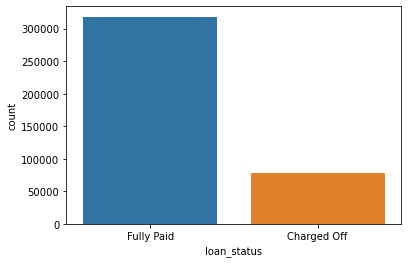

In [25]:
sns.countplot(x='loan_status', data=df)

#looks like dataset is not properly balanced

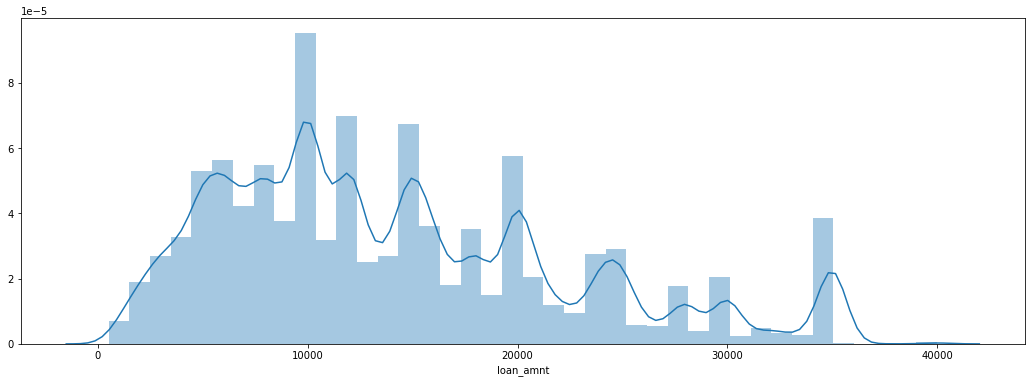

In [32]:
plt.figure(figsize=(18,6))
sns.distplot(df['loan_amnt'], kde=True, bins=40)

In [35]:
corrtable=df.corr()

In [37]:
corrtable

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


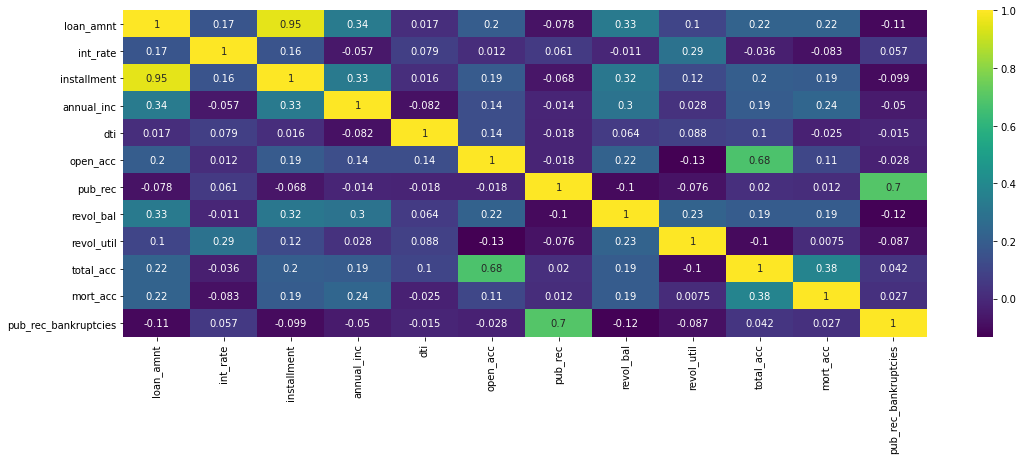

In [45]:
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [51]:
# as per correlation we could see loan amount and instalment has high corr. Because basd on loan amount 
#instalment will get impact. So as per corr we should remove one variable else it will be overfit into model

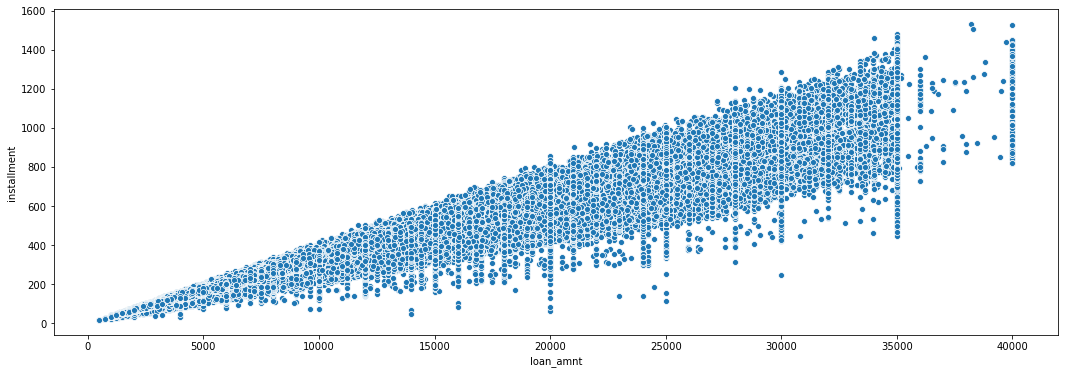

In [49]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='loan_amnt', y='installment', data=df)
plt.show()

In [52]:
#now we can see based on loan amount how instalment is getting increase. Its very high correlation we can find from corr outcome

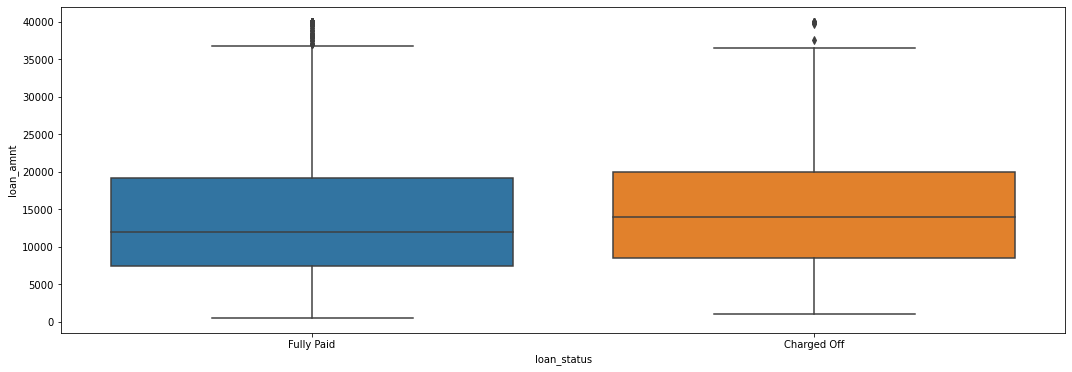

In [54]:
plt.figure(figsize=(18,6))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [55]:
#From here we can see mean of charged off higher than Fully paid.

In [62]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [63]:
#here we can see charged of amout high from all aspects mean, std division, 25%, 50%, 75%. Even though charged off count is low.

In [64]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [65]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [66]:
#we can see subgrade drive from grade

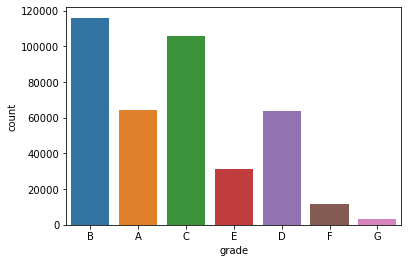

In [68]:
sns.countplot(x='grade',data=df)

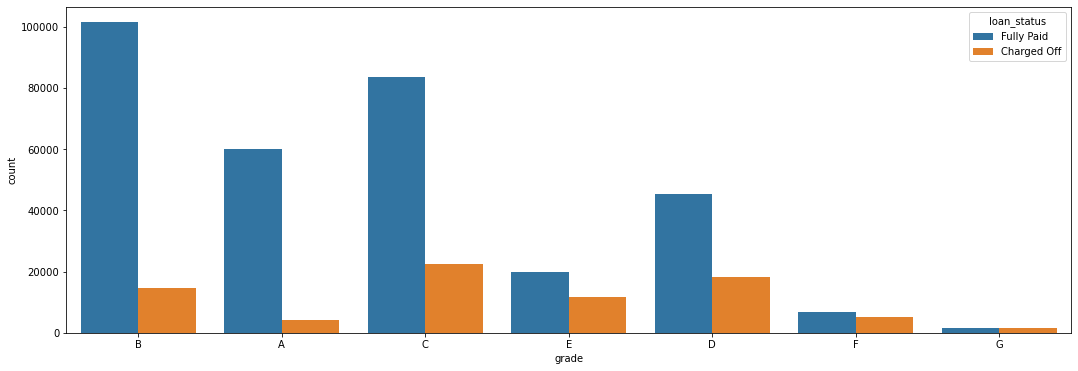

In [70]:
plt.figure(figsize=(18,6))
sns.countplot(x='grade',data=df, hue='loan_status')

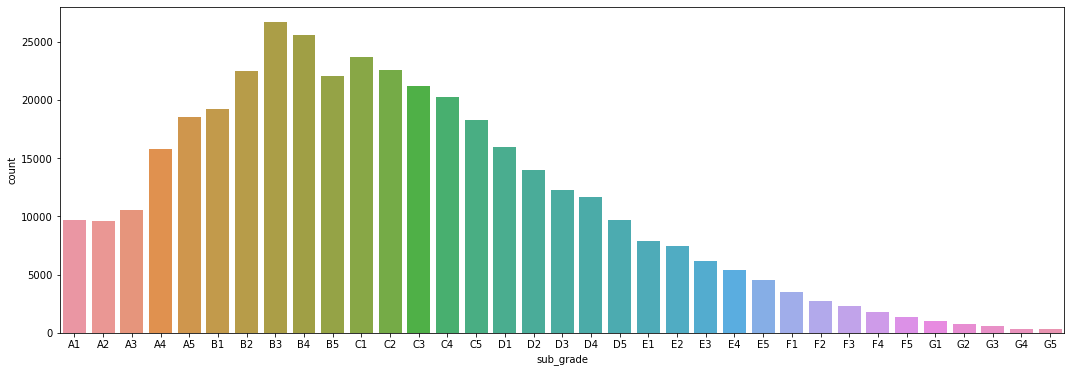

In [74]:
plt.figure(figsize=(18,6))
subgrade=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, order=subgrade)

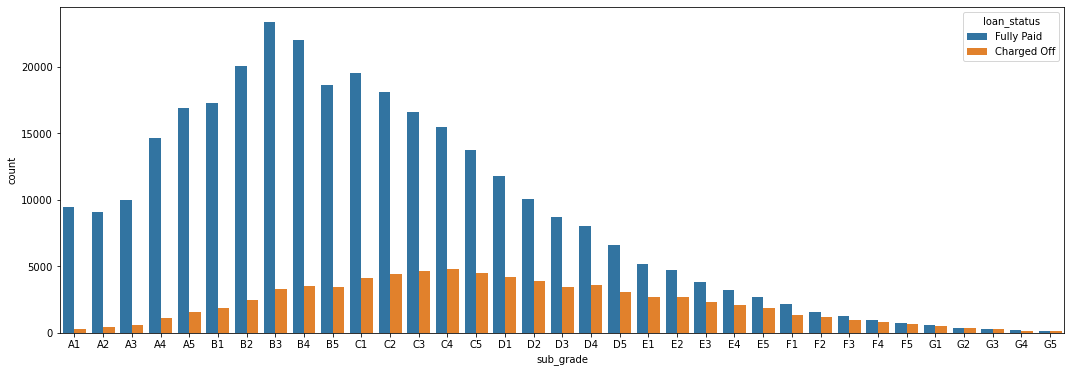

In [77]:
plt.figure(figsize=(18,6))
subgrade=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade, hue='loan_status')
plt.show()

In [78]:
#now using filter function we are going to zoom in to lower plots

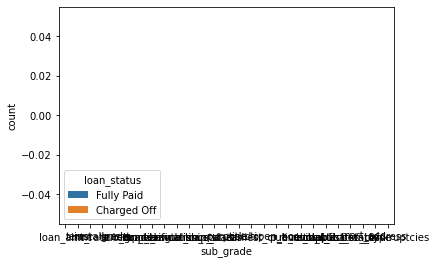

In [90]:
efg=df[(df['grade']=='E')|(df['grade']=='F')|(df['grade']=='G')]
subgrade=sorted(efg['sub_grade'].unique())
sns.countplot(x='sub_grade',data=efg,order=efg,hue='loan_status')
plt.show()

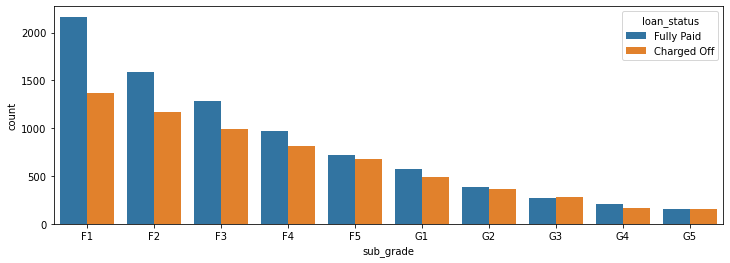

In [89]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')